# Загрузка и подготовка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
wcd_df = pd.DataFrame
wcd_df = pd.read_csv('../data/wholesale_customers_data_preprocessed.csv' )
wcd_df.head()

,Unnamed: 0,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_Lisbon,Region_Oporto,Other Region
0,0,1,12669,9656,7561,214,2674,1338,0,0,1
1,1,1,7057,9810,9568,1762,3293,1776,0,0,1
2,2,1,6353,8808,7684,2405,3516,7844,0,0,1
3,3,0,13265,1196,4221,6404,507,1788,0,0,1
4,4,1,22615,5410,7198,3915,1777,5185,0,0,1


In [ ]:
del wcd_df['Unnamed: 0']

In [ ]:
wcd_df

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_Lisbon,Region_Oporto,Other Region
0,1,12669,9656,7561,214,2674,1338,0,0,1
1,1,7057,9810,9568,1762,3293,1776,0,0,1
2,1,6353,8808,7684,2405,3516,7844,0,0,1
3,0,13265,1196,4221,6404,507,1788,0,0,1
4,1,22615,5410,7198,3915,1777,5185,0,0,1
...,...,...,...,...,...,...,...,...,...,...
435,0,29703,12051,16027,13135,182,2204,0,0,1
436,0,39228,1431,764,4510,93,2346,0,0,1
437,1,14531,15488,30243,437,14841,1867,0,0,1
438,0,10290,1981,2232,1038,168,2125,0,0,1


Будем делить на классы по параметру Channel (оптовая или розничная продажа продуктов)

In [ ]:
wcd_df['Channel'].unique()

array([1, 0])

In [ ]:
X = wcd_df.iloc[:, 1: ].values
y = wcd_df.iloc[:, 0].values
print(X)

[[12669  9656  7561 ...     0     0     1]
 [ 7057  9810  9568 ...     0     0     1]
 [ 6353  8808  7684 ...     0     0     1]
 ...
 [14531 15488 30243 ...     0     0     1]
 [10290  1981  2232 ...     0     0     1]
 [ 2787  1698  2510 ...     0     0     1]]


In [ ]:
print(y)

[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


Разобьем датасет на обучение и тестовые данные, масштабируем данные.

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

print(Counter(y_train).values())
print(Counter(y_test).values())

dict_values([238, 114])
dict_values([60, 28])


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.72818811, -0.53345862, -0.54791887, ..., -0.43495884,
        -0.33228014,  0.59047354],
       [-0.12307233, -0.61028961, -0.41377346, ..., -0.43495884,
        -0.33228014,  0.59047354],
       [ 3.35816702, -0.10444175, -0.05410821, ...,  2.29906813,
        -0.33228014, -1.69355598],
       ...,
       [-0.17583557, -0.5837145 , -0.67551562, ..., -0.43495884,
        -0.33228014,  0.59047354],
       [-0.87667084, -0.0360306 , -0.13596659, ..., -0.43495884,
        -0.33228014,  0.59047354],
       [-0.31669965, -0.68554188, -0.39116008, ..., -0.43495884,
        -0.33228014,  0.59047354]])

#  Классификация

## Метод k-ближайших соседей (K-Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=6, p=4)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=4,
                     weights='uniform')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56  4]
 [ 6 22]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.85      0.79      0.81        28

    accuracy                           0.89        88
   macro avg       0.87      0.86      0.87        88
weighted avg       0.89      0.89      0.89        88



## Классификатор дерева решений (Decision Tree Classifier)

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[54  6]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        60
           1       0.81      0.89      0.85        28

    accuracy                           0.90        88
   macro avg       0.88      0.90      0.89        88
weighted avg       0.90      0.90      0.90        88



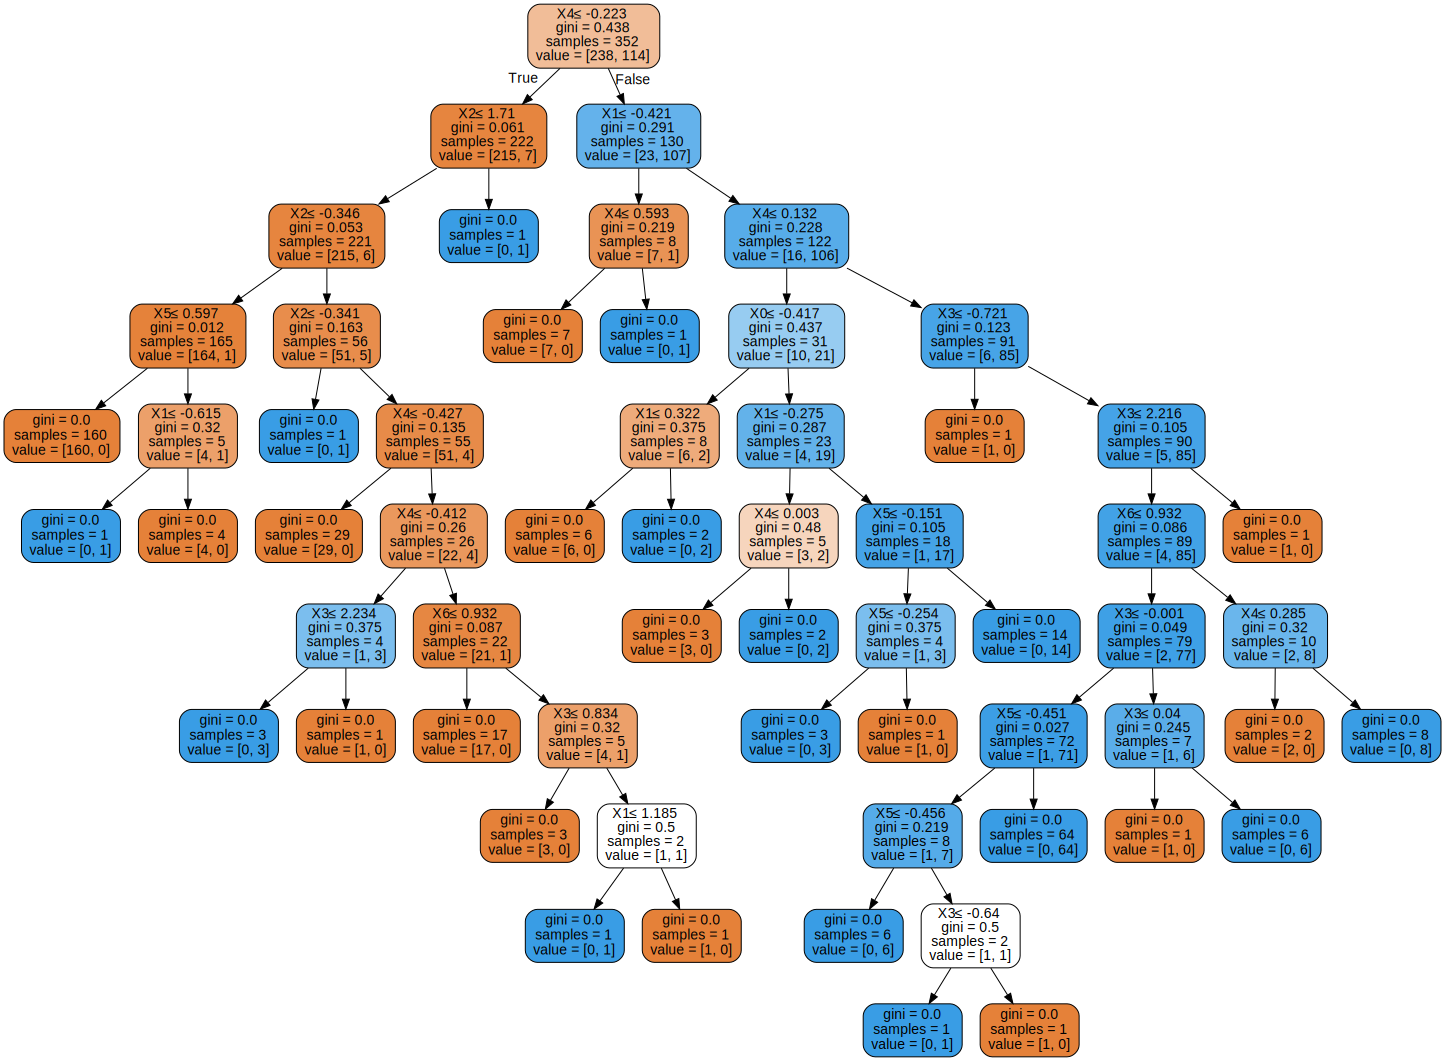

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("wcd")
graph = graphviz.Source(dot_data)  
graph 

## Наивный байесовский классификатор (Naive Bayes)

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[55  5]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        60
           1       0.83      0.89      0.86        28

    accuracy                           0.91        88
   macro avg       0.89      0.90      0.90        88
weighted avg       0.91      0.91      0.91        88



## Метод опорных векторов (Support Vector Machines)

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[54  6]
 [ 5 23]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        60
           1       0.79      0.82      0.81        28

    accuracy                           0.88        88
   macro avg       0.85      0.86      0.86        88
weighted avg       0.88      0.88      0.88        88



## Логистическая регрессия (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[55  5]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        60
           1       0.83      0.89      0.86        28

    accuracy                           0.91        88
   macro avg       0.89      0.90      0.90        88
weighted avg       0.91      0.91      0.91        88



## Выводы по классификаторам

Меньше ошибок сделали наивный байесовский классификатор и логическая регрессия. При высокой точности у них большая полнота.

У метода k - ближайших соседей наибольшая точность 1 класса, но очень низкая полнота, в сравнении с остальными классификаторами.

У метода опорных векторов при невысокой точности низкая полнота и, следовательно наименьшее значение оченки F1 из представленных алгоритмов.

И остается оценить классификатор дерева решений. У него сбалансированы и достаточно высоки показатели точности и полноты, однако он все равно уступет байесовскому классификатору и логической регрессии.

# Кросс-валидация

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index, "\n")
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 48  49  52  53  56  57  60  61  62  63  65  67  73  74  77  81  82  84
  85  86  92  94  96 100 101 102 106 107 108 109 111 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332

In [ ]:
for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = KNeighborsClassifier(n_neighbors=5)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  print(clf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        59
           1       0.81      0.76      0.79        29

    accuracy                           0.86        88
   macro avg       0.85      0.84      0.84        88
weighted avg       0.86      0.86      0.86        88

0.8636363636363636
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        59
           1       0.77      0.83      0.80        29

    accuracy                           0.86        88
   macro avg       0.84      0.85      0.85        88
weighted avg       0.87      0.86      0.86        88

0.8636363636363636
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        60
           1       0.77      0.96      0.86        28

    accuracy                           0.90        88
   macro avg       0.88      0.92      0.89        88
weighted avg       0.91      0.90   

# Подбор гиперпараметров

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors':[1, 2, 3, 4, 5, 6]}

knn = KNeighborsClassifier()

clf = GridSearchCV(knn, parameters)

clf.fit(X_train, y_train)

clf.cv_results_

{'mean_fit_time': array([0.00068769, 0.00068183, 0.0005662 , 0.00058546, 0.00060472,
        0.00055771]),
 'mean_score_time': array([0.0036953 , 0.00363092, 0.00294156, 0.00302353, 0.00317802,
        0.00298042]),
 'mean_test_score': array([0.88925553, 0.88933602, 0.88921529, 0.88639839, 0.89488934,
        0.88921529]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6}],
 'rank_test_score': array([3, 2, 4, 6, 1, 4], dtype=int32),
 'split0_test_score': array([0.85915493, 0.83098592, 0.84507042, 0.83098592, 0.84507042,
        0.83098592]),
 'split1_test_score': array([0.90140845, 0.90140845, 0.92957746, 0.92957746, 0.94366197,
        0.94366197]),
 'split2_test_score': array([0.85714286, 0.88571429, 0.84285714, 0.87142857

In [ ]:
clf.best_params_

{'n_neighbors': 5}

Наиболее выгодням числом соседей является 5 соседей.